In [1]:
# Setup Imports
import sys, os
from pathlib import Path

# Add project root and src to Python path
PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

SRC_DIR = PROJECT_ROOT / "src"
if str(SRC_DIR) not in sys.path:
    sys.path.insert(0, str(SRC_DIR))

# Loader and Plotting
from src.utils.load_dataset_ucr import load_dataset
from src.utils.plotting import (
    plot_full_series,
    plot_zoom_anomaly,
    plot_zoom_normal
)

# Matplotlib global settings
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 4)

In [2]:
# List of datasets to explore
dataset_files = [
    "../data/all_raw/186_UCR_Anomaly_respiration1_100000_110260_110412.txt",
    "../data/all_raw/171_UCR_Anomaly_gaitHunt2_18500_31200_31850.txt",
    "../data/all_raw/152_UCR_Anomaly_PowerDemand1_9000_18485_18821.txt",
    "../data/all_raw/032_UCR_Anomaly_DISTORTEDInternalBleeding4_1000_4675_5033.txt",
    "../data/all_raw/098_UCR_Anomaly_NOISEInternalBleeding16_1200_4187_4199.txt"
]


Processing dataset:
../data/all_raw/186_UCR_Anomaly_respiration1_100000_110260_110412.txt



{'name': 'respiration1',
 'train_end': 100000,
 'anomaly_start': 110260,
 'anomaly_end': 110412,
 'length': 200000}

Saving plots to: /Users/apostolos_sterpis/BSP_Anomaly_Detection/results/plots/respiration1


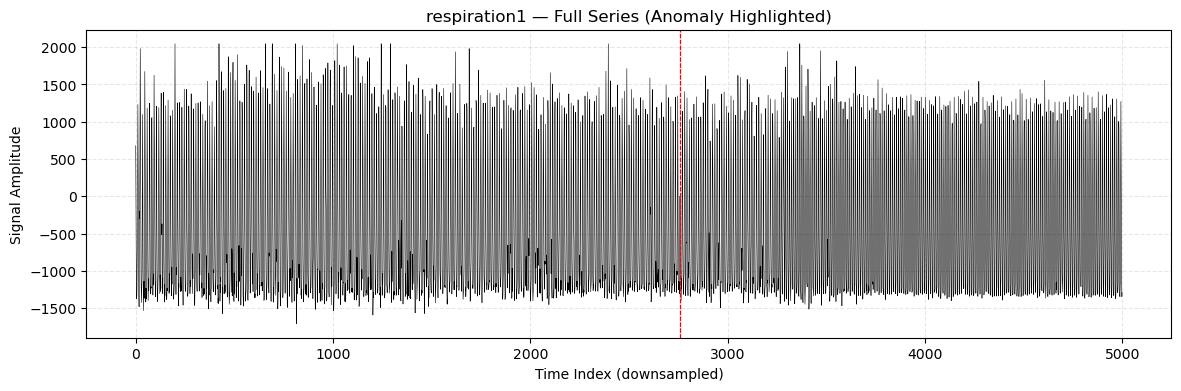

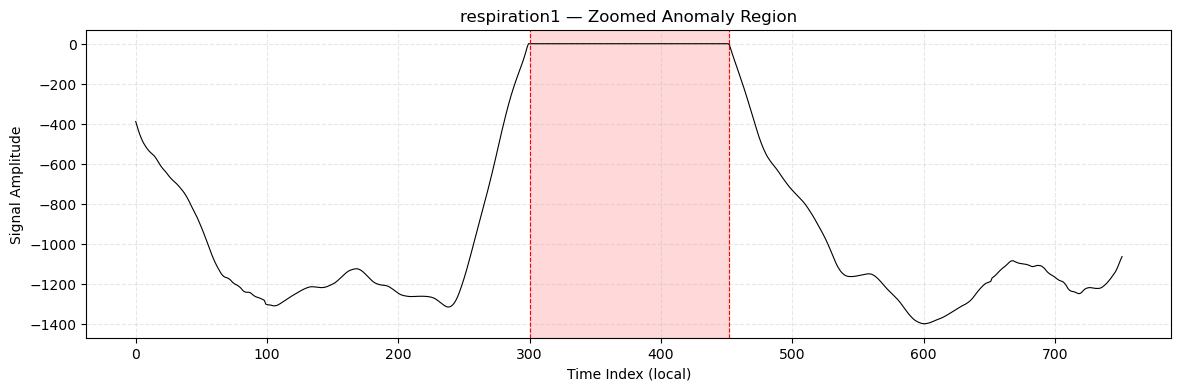

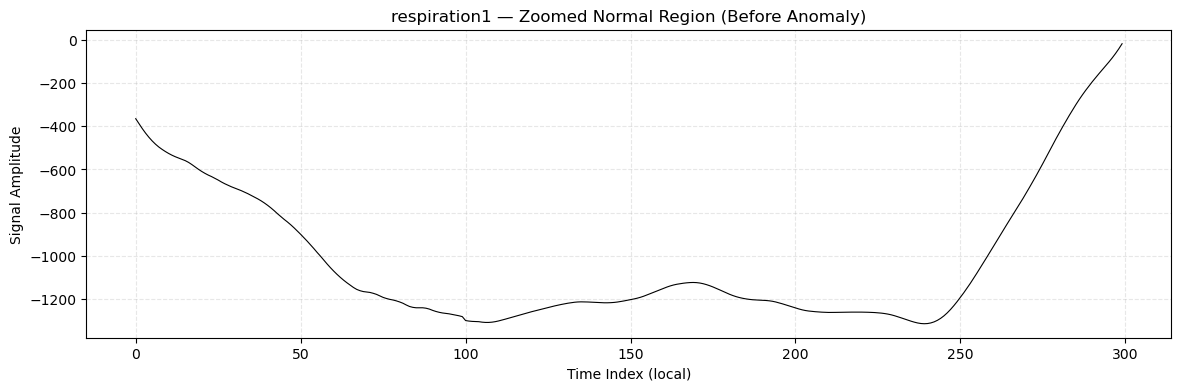


Processing dataset:
../data/all_raw/171_UCR_Anomaly_gaitHunt2_18500_31200_31850.txt



{'name': 'gaitHunt2',
 'train_end': 18500,
 'anomaly_start': 31200,
 'anomaly_end': 31850,
 'length': 64000}

Saving plots to: /Users/apostolos_sterpis/BSP_Anomaly_Detection/results/plots/gaitHunt2


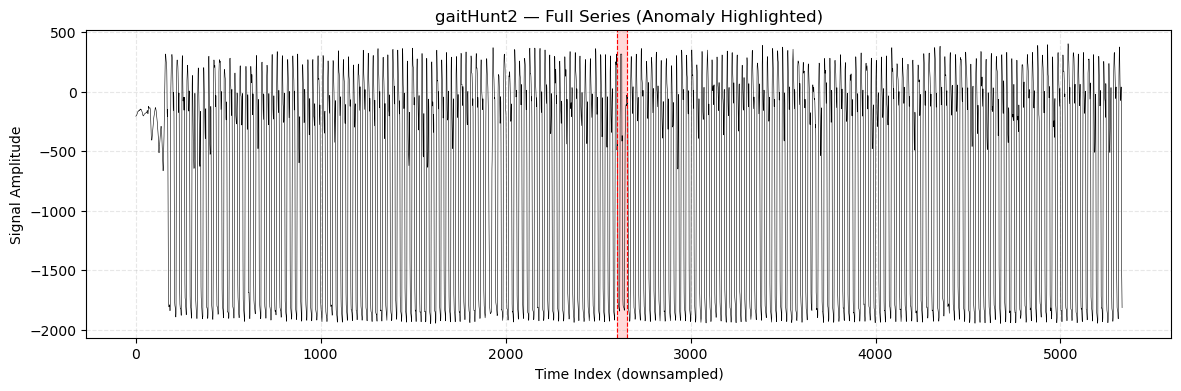

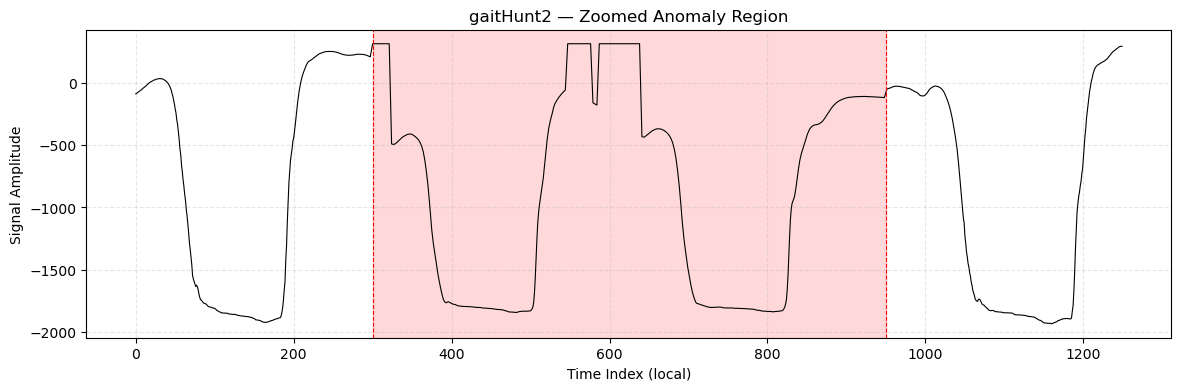

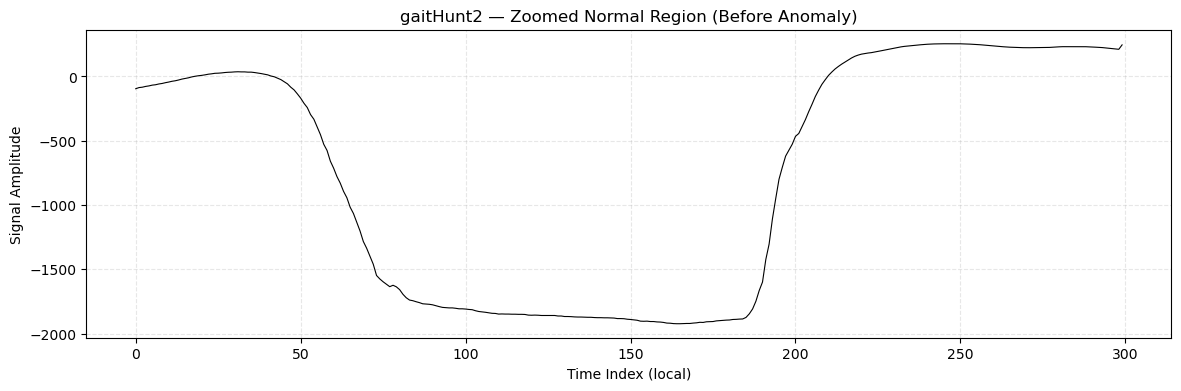


Processing dataset:
../data/all_raw/152_UCR_Anomaly_PowerDemand1_9000_18485_18821.txt



{'name': 'PowerDemand1',
 'train_end': 9000,
 'anomaly_start': 18485,
 'anomaly_end': 18821,
 'length': 29931}

Saving plots to: /Users/apostolos_sterpis/BSP_Anomaly_Detection/results/plots/PowerDemand1


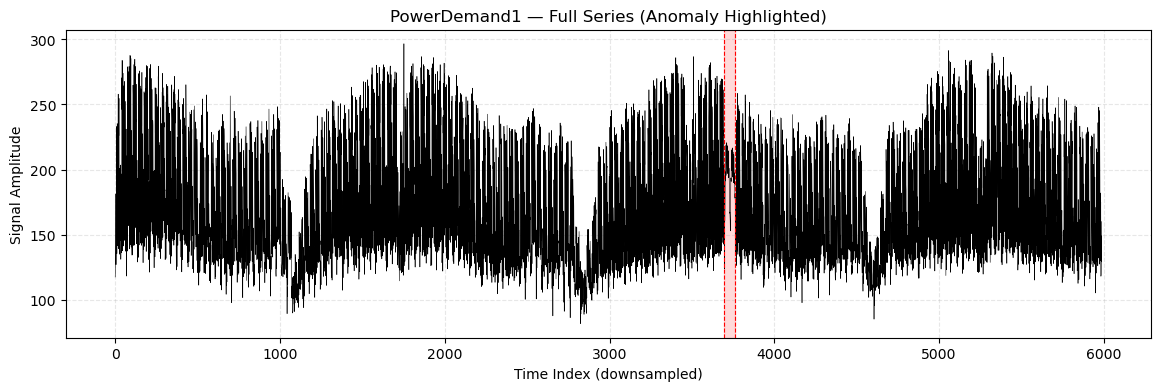

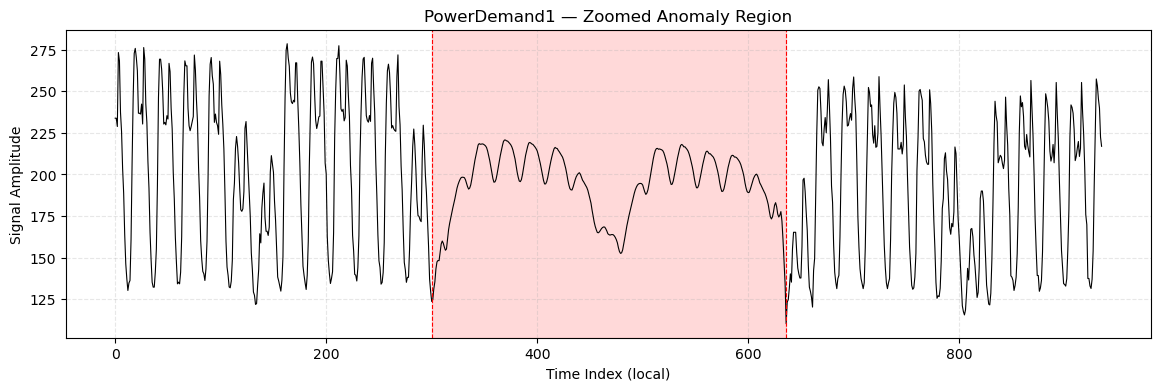

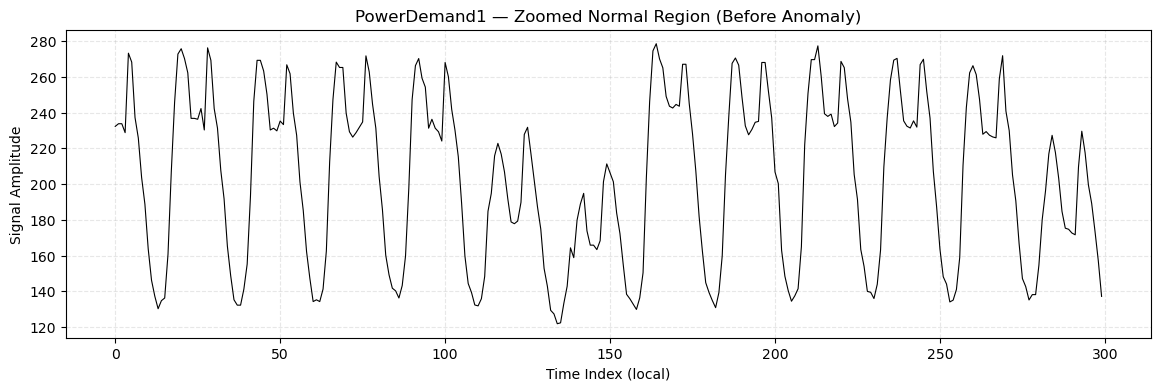


Processing dataset:
../data/all_raw/032_UCR_Anomaly_DISTORTEDInternalBleeding4_1000_4675_5033.txt



{'name': 'DISTORTEDInternalBleeding4',
 'train_end': 1000,
 'anomaly_start': 4675,
 'anomaly_end': 5033,
 'length': 7321}

Saving plots to: /Users/apostolos_sterpis/BSP_Anomaly_Detection/results/plots/DISTORTEDInternalBleeding4


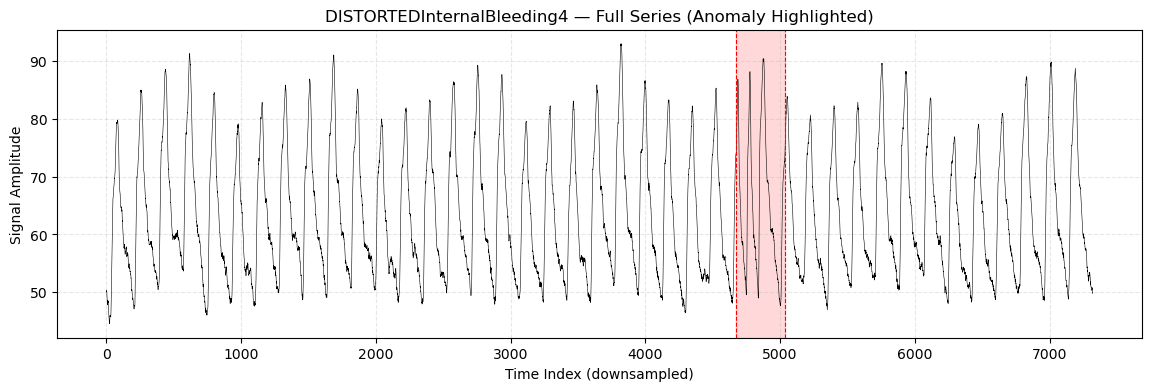

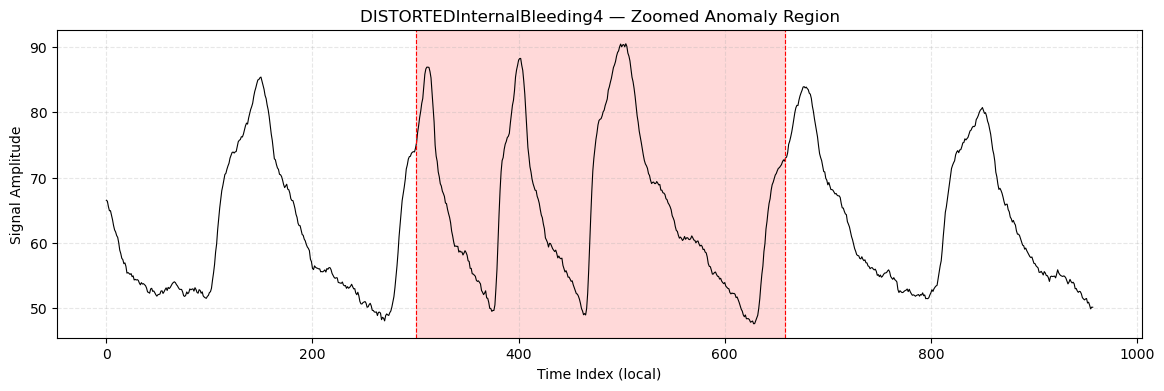

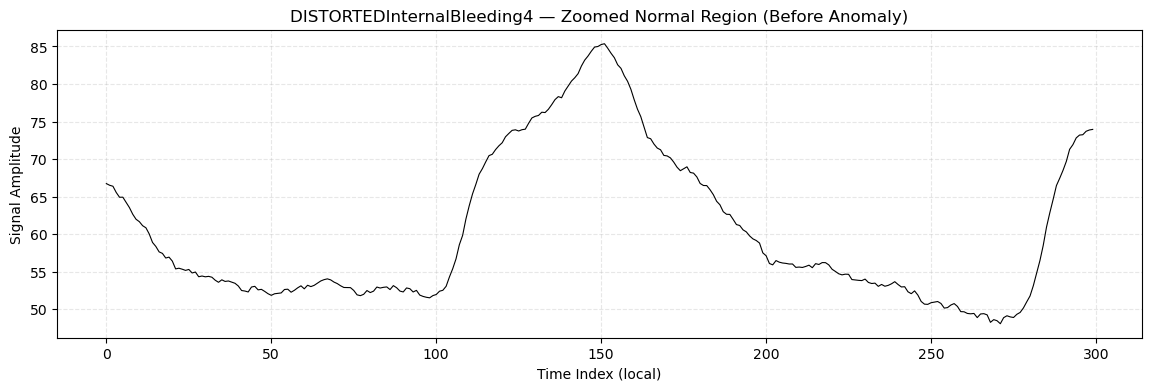


Processing dataset:
../data/all_raw/098_UCR_Anomaly_NOISEInternalBleeding16_1200_4187_4199.txt



{'name': 'NOISEInternalBleeding16',
 'train_end': 1200,
 'anomaly_start': 4187,
 'anomaly_end': 4199,
 'length': 7501}

Saving plots to: /Users/apostolos_sterpis/BSP_Anomaly_Detection/results/plots/NOISEInternalBleeding16


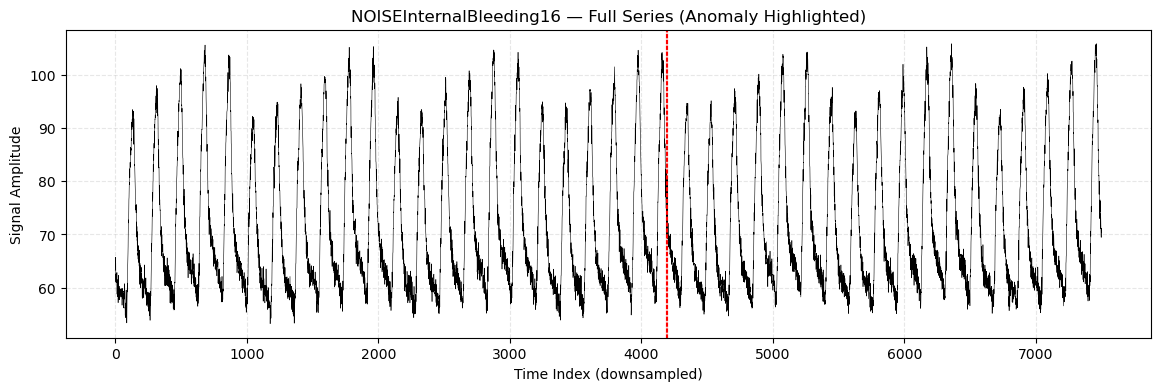

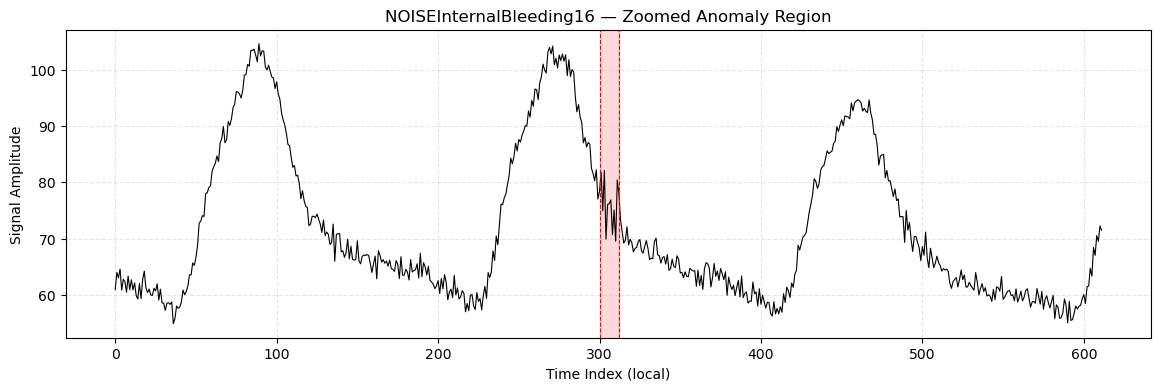

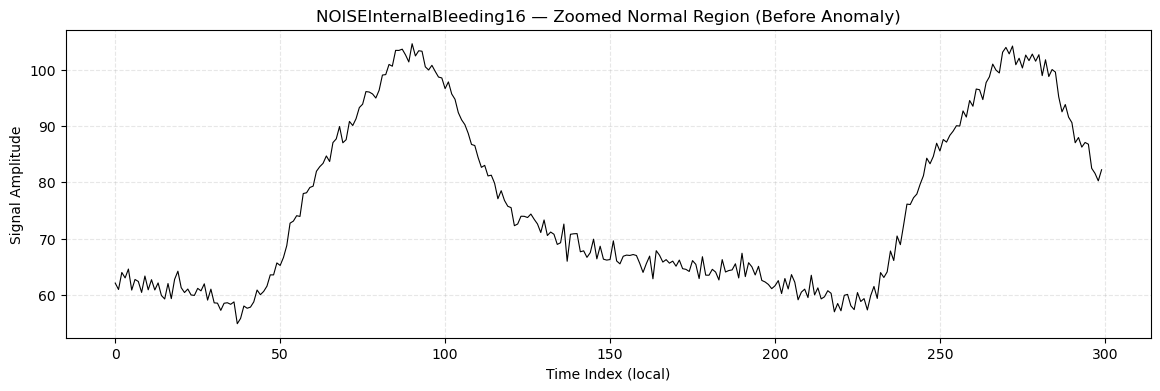

In [3]:
# Visualization loop
for path in dataset_files:
    print("\n==============================================")
    print(f"Processing dataset:\n{path}")
    print("==============================================\n")

    # Load raw data and metadata
    data, meta = load_dataset(path)
    display(meta)

    # Output directory for the dataset
    outdir = PROJECT_ROOT / "results" / "plots" / meta["name"]
    outdir.mkdir(parents=True, exist_ok=True)
    print("Saving plots to:", outdir)

    # Raw full series
    fig = plot_full_series(
        data,
        meta,
        outdir / "full_series.png",
        title_prefix=meta["name"]
    )
    plt.show()

    # Zoomed anomaly region
    fig = plot_zoom_anomaly(
        data,
        meta,
        outdir / "zoom_anomaly.png",
        title_prefix=meta["name"]
    )
    plt.show()

    # # Zoomed normal region
    fig = plot_zoom_normal(
        data,
        meta,
        outdir / "zoom_normal.png",
        title_prefix=meta["name"]
    )
    if fig is not None:
        plt.show()